# Super Easy Ride 3000    

[Link to Tableau Dashboard](https://public.tableau.com/app/profile/aleksei5255/viz/Super_Easy_Ride_3000/Sales)

In [1]:
# imports required 
import pandas as pd

In [ ]:
df = pd.read_csv('./data/taxi_data.csv')

In [3]:
# list of dimensions and measures:
list(df.columns)

['VendorID',
 'pickup_datetime',
 'dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'str_and_fwd_flag',
 'FLocationID',
 'TLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'xcorp_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount']

For analysis convenience let's join the description of the numeric data:

In [4]:
# VendorId description:
vendor_description = pd.DataFrame({
    'VendorID': [1, 2],
    'Vendor': ['SkyFort Mobile Technologies', 'Micron Inc']
})

# join vendor description to the main dataset:
df = pd.merge(df, vendor_description, on='VendorID', how='left')
# drop column "VendorId":
df = df.drop(columns=['VendorID'])

In [5]:
# RatecodeID description:
rate_code_id_description = pd.DataFrame({
    'RatecodeID': [1,2,3,4,5,6],
    'Rate_code': ['Standard', 'Rate_2', 'Rate_3', 'Rate_4', 'Rate_5', 'Rate_6']
})

# join rate code:
df = pd.merge(df, rate_code_id_description, on='RatecodeID', how='left')
df = df.drop(columns=['RatecodeID'])

In [6]:
# str_and_fwd_flag description:
str_and_fwd_flag_description = pd.DataFrame({
    'str_and_fwd_flag': ['Y', 'N'],
    'information_transfer_flag': ['Later Saved', 'Online Saved']
})

df = pd.merge(df, str_and_fwd_flag_description, on='str_and_fwd_flag', how='left')
df = df.drop(columns=['str_and_fwd_flag'])

In [7]:
# payment type description:
payment_type_description = pd.DataFrame({
    'payment_type': [1,2,3,4,5,6],
    'payment_type_descr': [
        'Bank_card',
        'Cash',
        'No_charge',
        'Not paid',
        'N/A',
        'Canceled'
    ]
})

df = pd.merge(df, payment_type_description, on='payment_type', how='left')
df = df.drop(columns=['payment_type'])
df = df.rename(columns={
    'payment_type_descr': 'payment_type'
})

In [8]:
# add index for analysis:
df.index.names = ['Ride_Index']

In [9]:
# filter October 2077 data before analysis
# convert pickup_datetime column to pandas datetime:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])
# filter
df = df[(df['pickup_datetime'].dt.year == 2077) & (df['pickup_datetime'].dt.month == 10)]

in further analysis, we will not consider rides, where pickup time was later then dropoff time:

In [10]:
# filter negative time ride:
df = df[df['dropoff_datetime'] >= df['pickup_datetime']]

In [11]:
df

,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,FLocationID,TLocationID,fare_amount,extra,xcorp_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,Vendor,Rate_code,information_transfer_flag,payment_type
Ride_Index,,,,,,,,,,,,,,,,,
0,2077-10-01 00:19:55,2077-10-01 00:23:57,1.0,0.40,48,163,4.50,3.00,0.5,0.0,0.00,0.3,8.30,SkyFort Mobile Technologies,Standard,Online Saved,Cash
1,2077-10-01 00:40:19,2077-10-01 00:55:17,2.0,4.30,144,141,14.50,3.00,0.5,2.0,0.00,0.3,20.30,SkyFort Mobile Technologies,Standard,Online Saved,Bank_card
2,2077-10-01 00:06:52,2077-10-01 00:21:23,1.0,5.00,137,80,17.00,3.00,0.5,5.2,0.00,0.3,26.00,SkyFort Mobile Technologies,Standard,Online Saved,Bank_card
3,2077-10-01 00:36:08,2077-10-01 00:36:15,1.0,0.00,25,25,-2.50,-0.50,-0.5,0.0,0.00,-0.3,-3.80,Micron Inc,Standard,Online Saved,Not paid
4,2077-10-01 00:36:08,2077-10-01 00:36:15,1.0,0.00,25,25,2.50,0.50,0.5,0.0,0.00,0.3,3.80,Micron Inc,Standard,Online Saved,Cash
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7213886,2077-10-31 23:20:00,2077-10-31 23:56:00,NaN,19.53,77,119,63.83,2.75,0.5,0.0,6.12,0.3,73.50,NaN,NaN,NaN,NaN
7213887,2077-10-31 23:42:00,2077-11-01 00:07:00,NaN,4.96,238,137,28.95,2.75,0.5,0.0,0.00,0.3,32.50,NaN,NaN,NaN,NaN
7213888,2077-10-31 23:50:35,2077-11-01 00:08:45,NaN,4.63,186,166,29.26,2.75,0.0,0.0,0.00,0.3,32.31,NaN,NaN,NaN,NaN


In [12]:
# save to .csv file for analysis:
df.to_csv('./data/data_Super_easy_ride_3000.csv', sep=';', index=True) # save with index

# Analysis:

- Vendor (data):
let's look at the total number of ridges aggregated over Data Providers (Vendors):  
  
let's create calculated field, which will count number of rides by index of ride (number_of_rides = count(Ride_Index))  
then, we will use this field to find total number of rides by of Data Suppliers  
after that, we may want to proportion between them and Table Calculation (Percentage of total may help us with that):


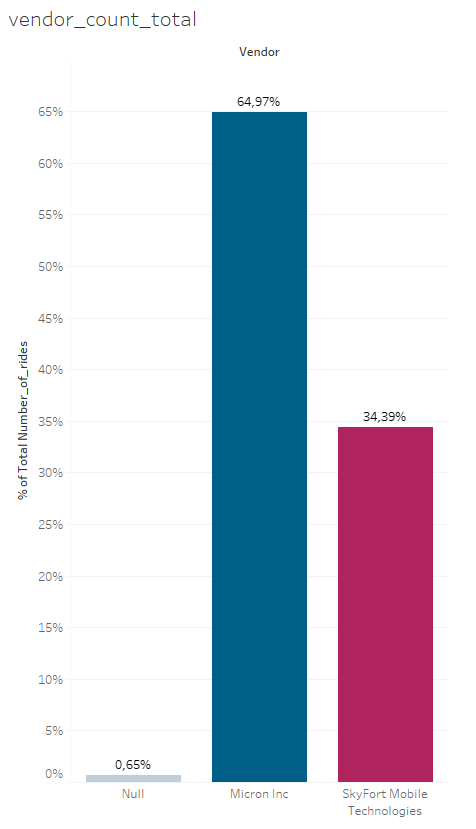

In [2]:
from IPython.display import Image
Image(filename='./pic/1.png')

using the graph,
- we can see that General situation with data providers is relatively good, since we have only less then 1% of missing data provider
- almost 2/3 of data (~65%) was provided by Micron Inc

# Dynamics of Number of Rides:  
let's take a look at the number of Rides grouped by Pickup date:  

Now let's look at the filtered data:  

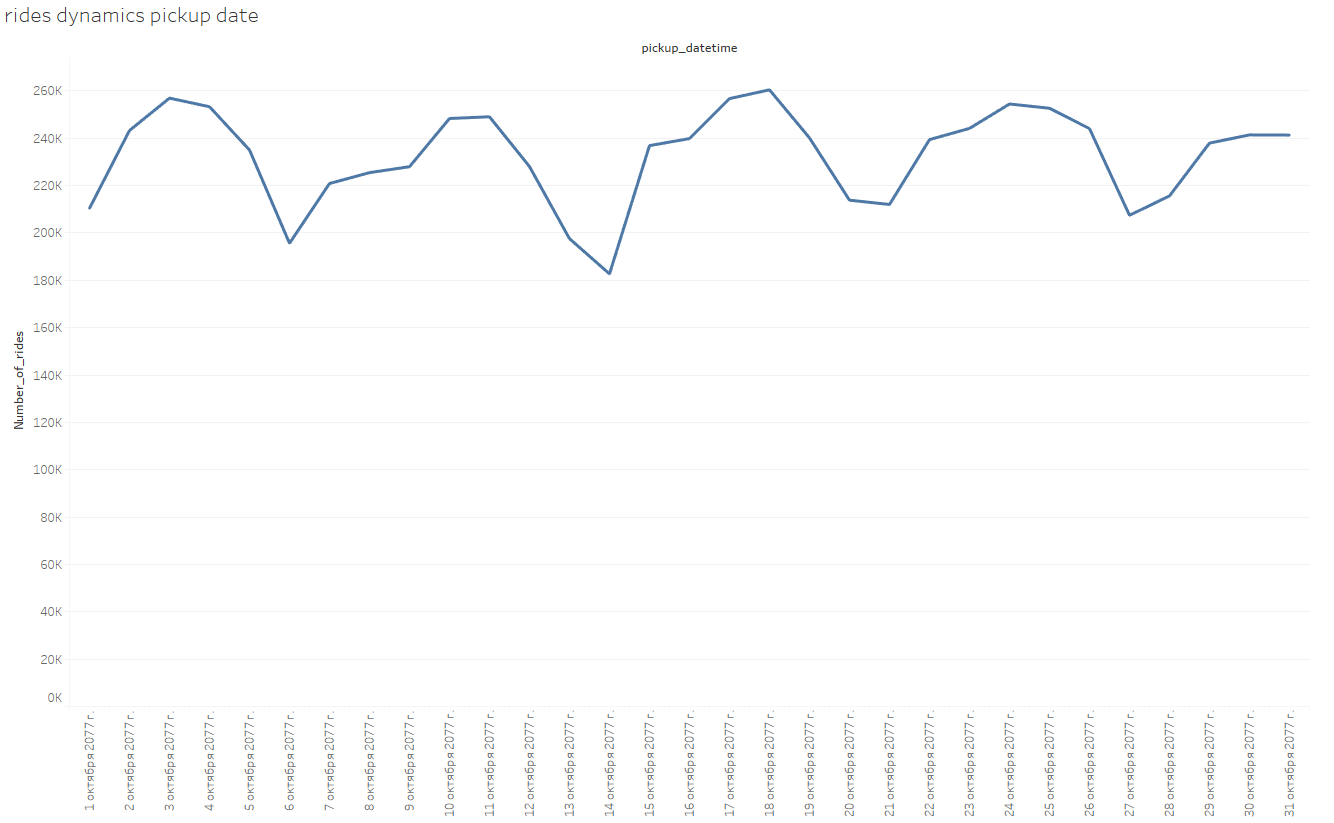

In [3]:
Image(filename='./pic/3.png')

We can observe one interesting feature of this distribution:  
- the data is cyclic with peaks every 3-4 days
    - this nature of data should be studied in depth, since it may also be influenced by the data system properties

# Ride time:

since we have filtered all rows, with negative ride time, we have the following basic statistics on ride time:
- minimum ride time = 0
- average ride time = 18.5 minutes
- median ride time = 12 minutes
- maximum ride time = 71 hour (which is very high)

let's also take a look at the distribution of ride time:  

we can see that the distribution is highly deviated (Not Normal)  
due to significant number of big outliers, average value is much higher then median value, therefore it can be misleading and not really representative

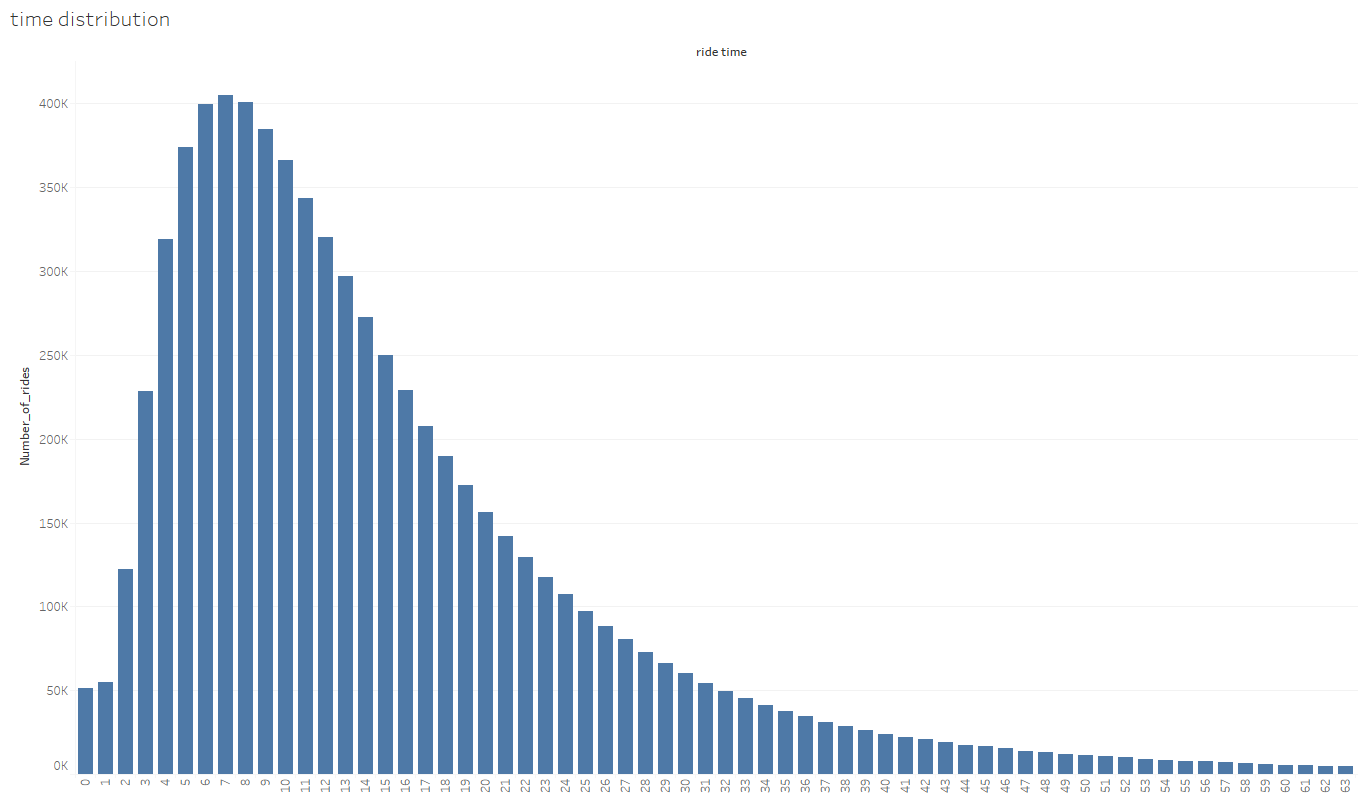

In [4]:
Image(filename='./pic/4.png')

therefore, if we would like to use this parameter in some form of statistical tests or predictive analysis, we would need to some how transform this distribution (cut outlier or use log scale)

# Passenger count

let's take a look at how many rides are held by our drivers with different number of passengers:  
  
  
generally, the picture shown is expected:  
- we have majority of rides ordered by 1 passenger (however, there could be situations when driver simply put 1 as may be proposed number by the system)
- there are almost 2% of rides without passengers (we can guess that service of delivery is also popular among our clients and we may try to facilitate this direction in future to grow on new market)

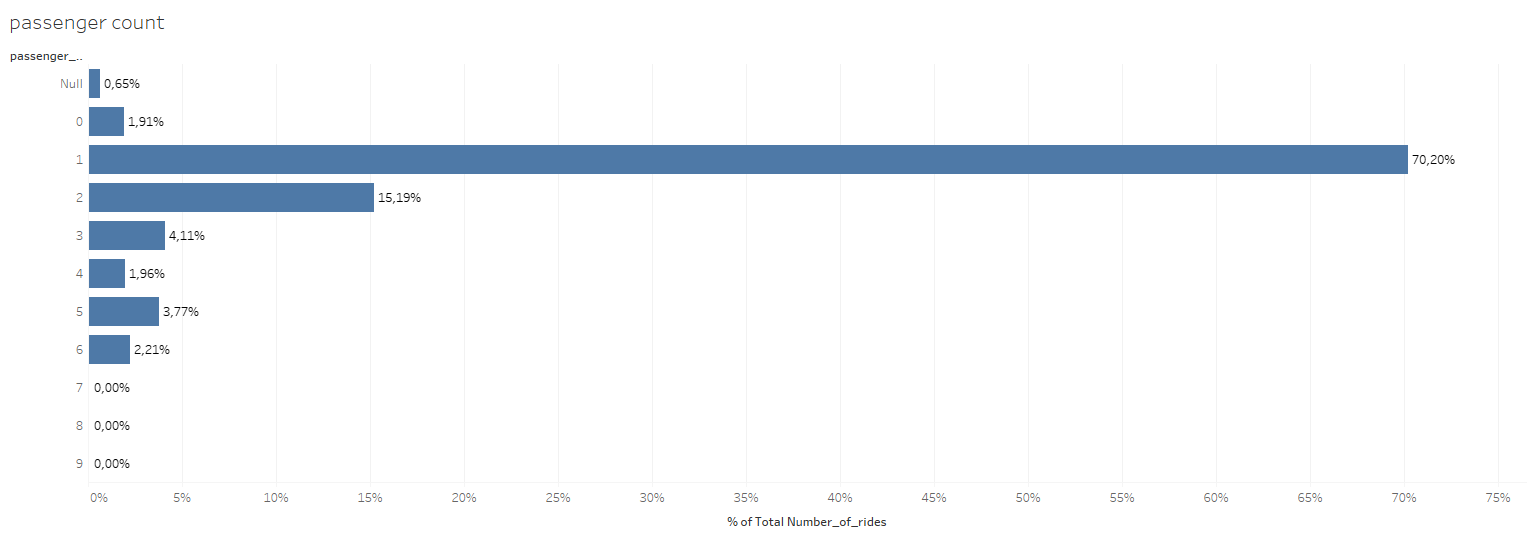

In [5]:
Image(filename='./pic/5.png')

# Trip distance  
trip distance statistics is logically very similar to Ride time statistics:   

we see similar deviated distribution with high positive outliers

for convenience of further analysis, we may split ride time and trip distance values into groups

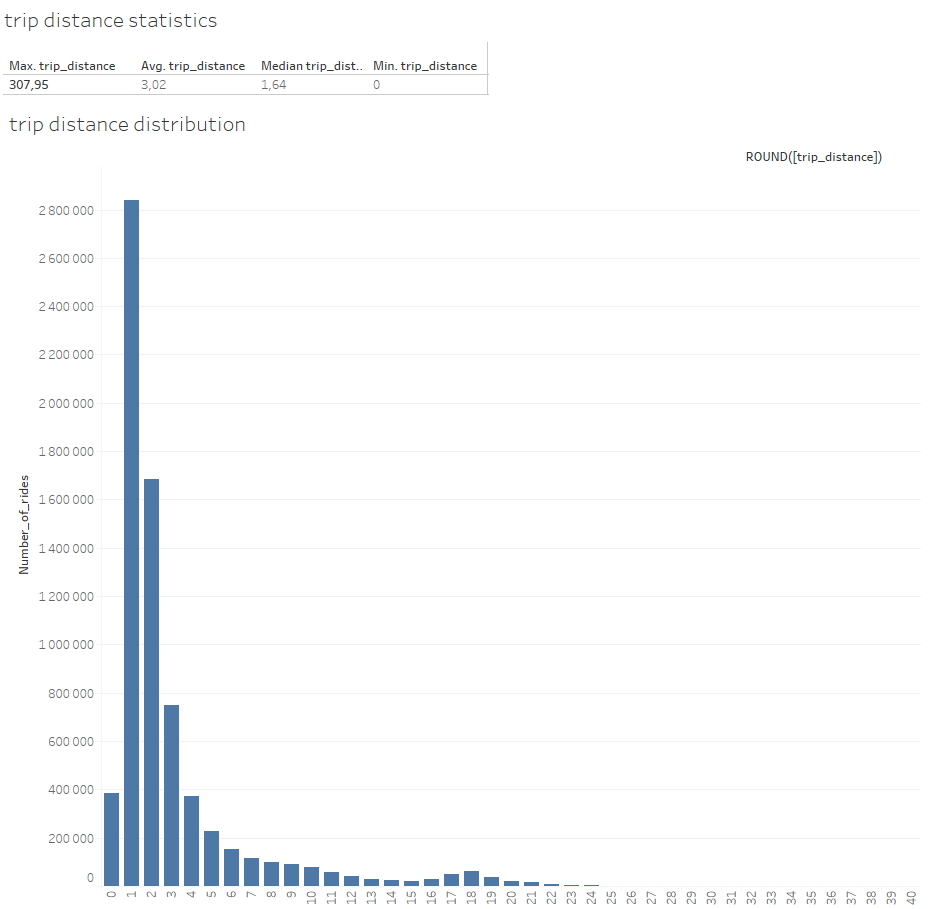

In [6]:
Image(filename='./pic/6.png')

- time groups:
    - 0-5 min
    - 5-10 min
    - 10-20 min
    - 20-30 min
    - 30-60 min
    - 1 hour +
  
- distance groups:
    - 0-1 km
    - 1-2 km
    - 2-5 km
    - 5-10 km
    - 10-20 km
    - 20 + km


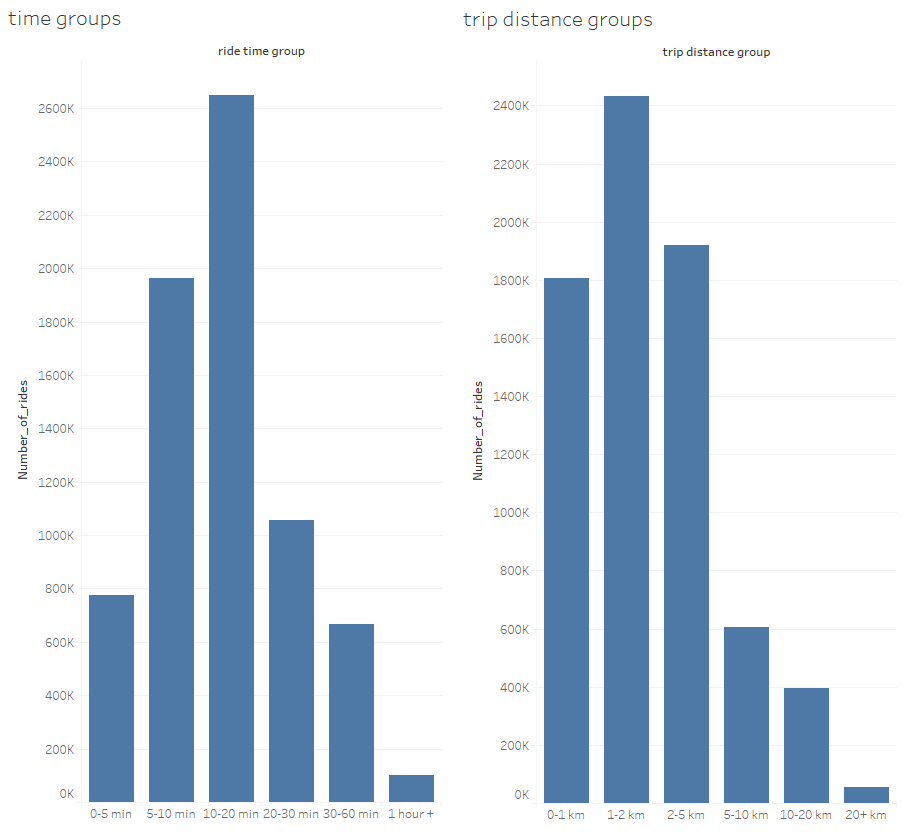

In [7]:
Image(filename='./pic/7.png')

# RateCode
let's calculate share of difference Rates In our business

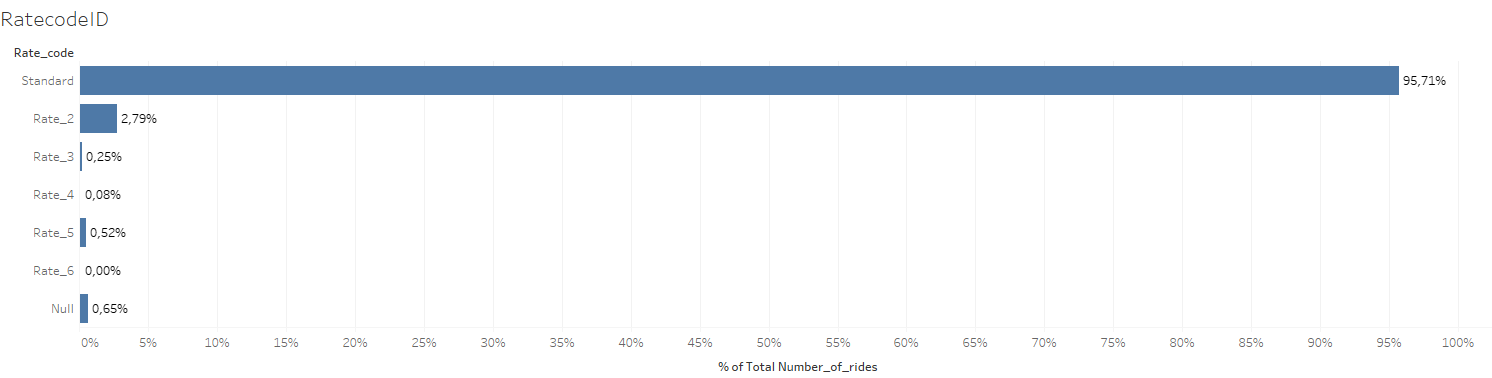

In [9]:
Image(filename='./pic/8.png')

we can see that the majority of rides are held by Standard Rate. For now we assume that standard rate is used for rides inside Central Area of City, therefore, we see that this result is in strong correlation with previously calculated share of Distance groups, where 95% of all rides is occupied by Distance groups < 10 km  

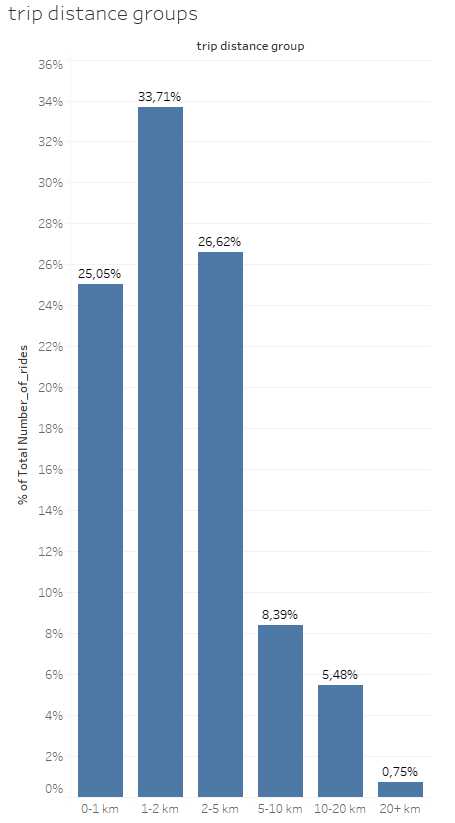

In [10]:
Image(filename='./pic/9.png')

# Str_and_fwd_flag :  
We can see that in the Majority of Rides we receive information online, which allows us create a systems of Real time analytics

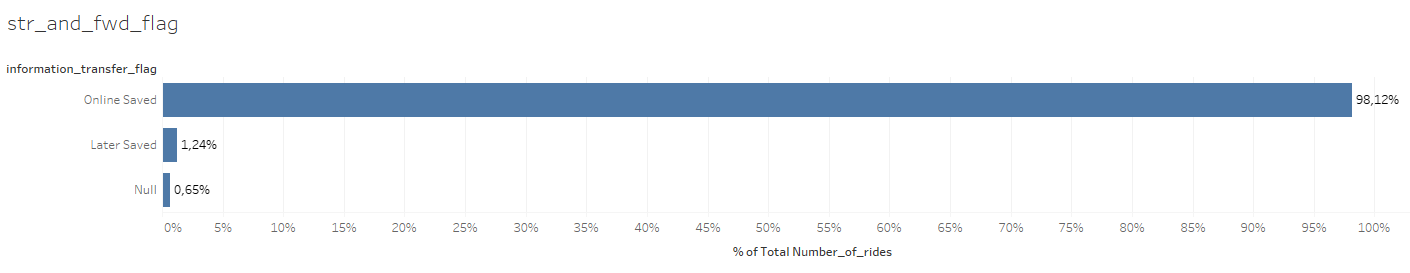

In [11]:
Image(filename='./pic/10.png')

# Payment Type:  

We can see that almost 1/4 of all rides were paid by credit card. This is a good tendency for the company, since this means that client and drivers trust our services. One another important advantage is that we can monitor real financial results of our business.

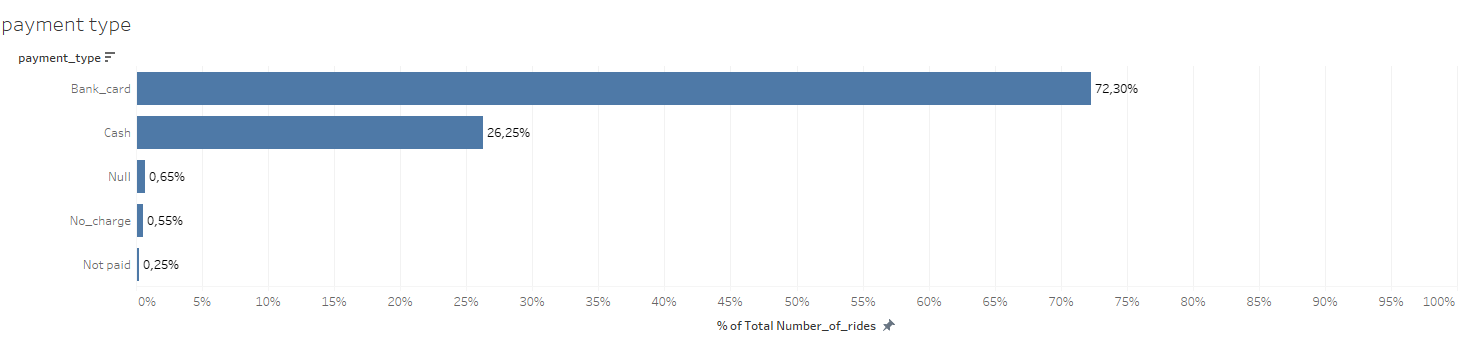

In [12]:
Image(filename='./pic/11.png')

# Fare Amount:  
let's take a look at the distribution of Fare Amount of rides:  


from the beginning this distribution is quite predictable with shape of Bell and big positive outliers, however in value 52$ we observe unexpected peak with really high number of rides evaluated for that Fare Amount. If this observation may help us to find some useful insights about our business: whether this amount is some feature of Algorithm that calculates Fare Amount or whether it is some kind of "Magical" value, which people use for longer rides...

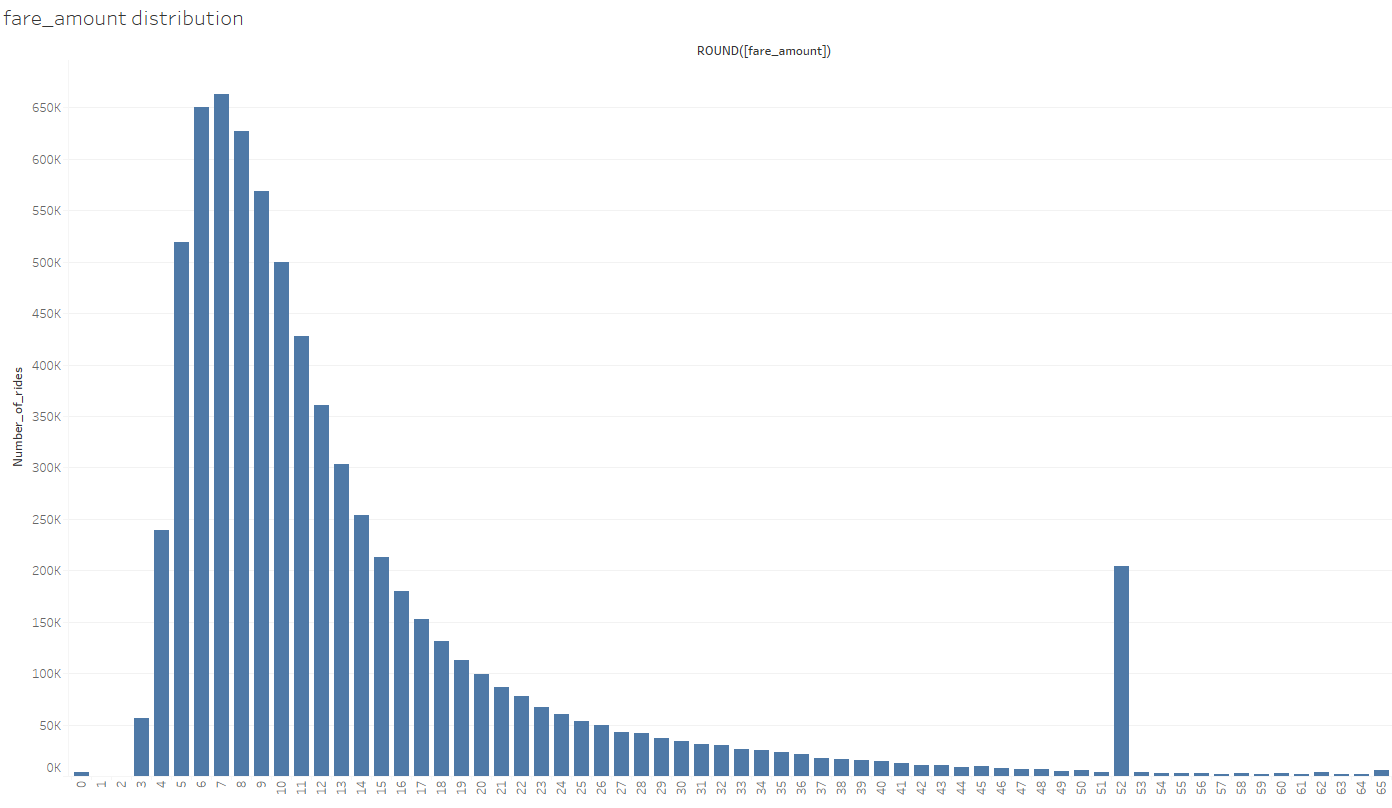

In [13]:
Image(filename='./pic/12.png')

# Total Amount:  

  
in the Total Amount Distribution we can see different picture: the is no Smooth shape of Bell curve that was observed in Fare Amount distribution.  
Here, we see several peaks and steep falls of the graph. This can be the sign of Multimodality, which in turn can be the sign that we have several clusters of clients. This could be important for Marketing and Pricing Strategies

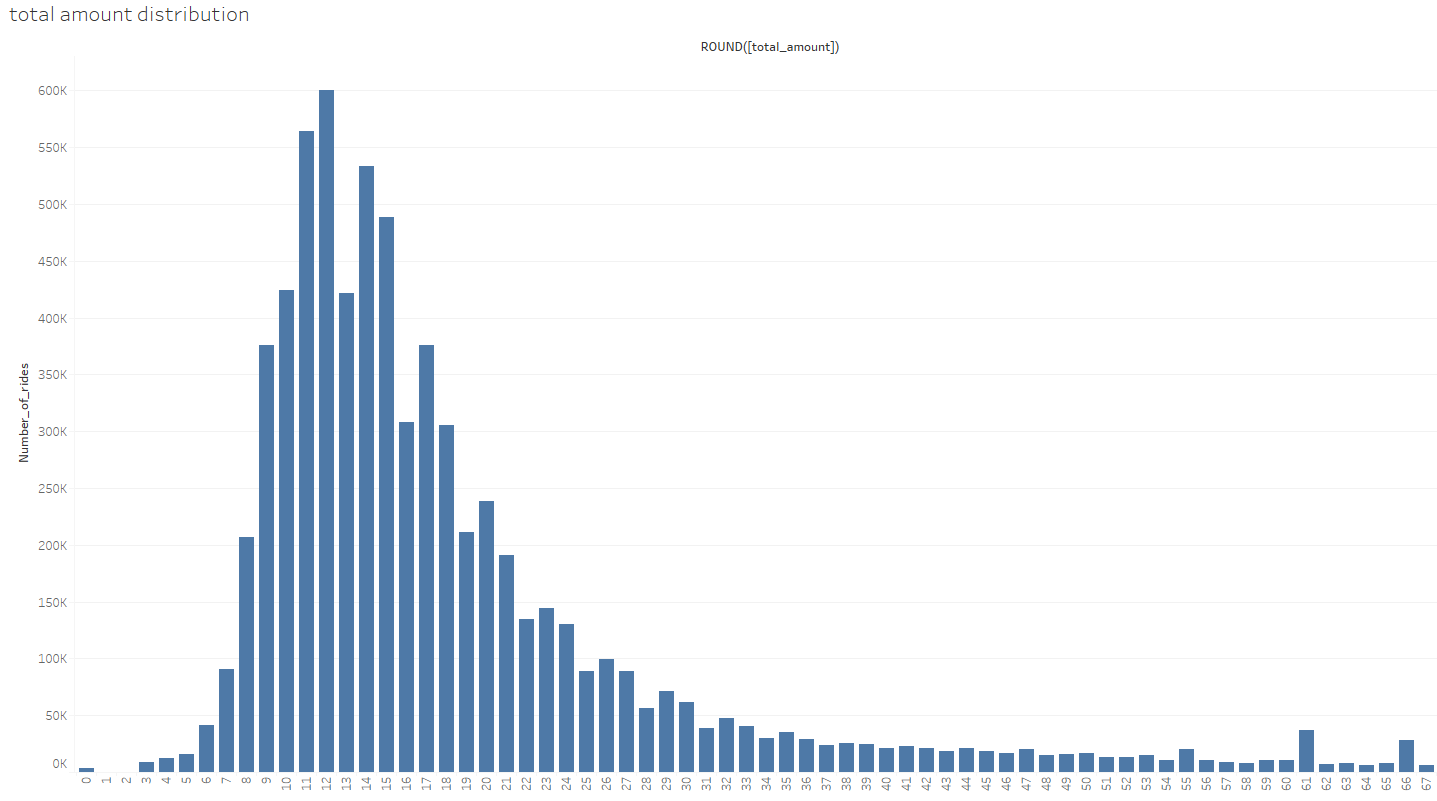

In [14]:
Image(filename='./pic/13.png')

# Moving Average (Total Amount Dynamics)  


For Sales dynamics Anlysis, let's take a look at the Total Amount dynamics together with Moving Average calculated by 30 previous days:  

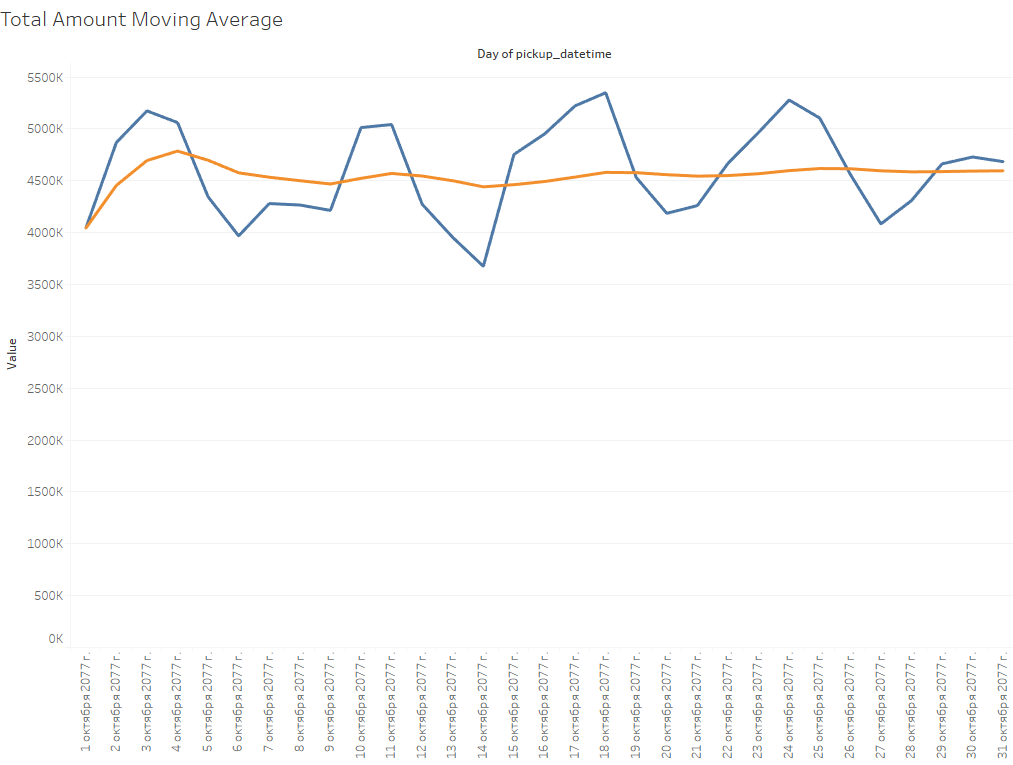

In [15]:
Image(filename='./pic/14.png')

We can see that in our Revenue the pattern of cyclical periods of ups and downs is saved. Moving Average may allow us to see the general trend in Our Incomes. One Month may be too small to make conclusions about business growth, however on the graph we can see that Sum of Total Revenue slightly increases to the end of the studied period:  
- 4.52 Million in the 10th of October and 4.6 Million in the end of the studied period.

# Sales by time groups  
to evaluate the efficiency of each ride we may want to take a look at the relationship between number of rides and generated Revenue per different time groups:   
(*this visualization shows percent of total number of rides in the Tooltip excluding filters in calculation of total, this was achieved by using FIXED LOD function*)   

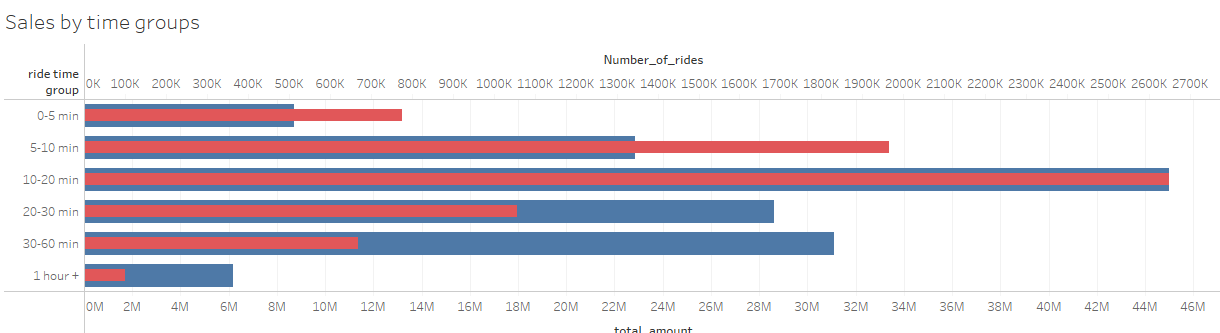

In [17]:
Image(filename='./pic/15.png')

In this analysis, we may try to assume that Total Amount value is our Revenue. This means that Total Amount already includes payments to the Drivers  
Assuming this, we will see that efficiency of longer rides is much higher than efficiency of shorter rides (efficiency = SUM(Total Amount) inside time group divided by Total Number of rides inside time group) we will name this parameter: "Revenue per Ride":  

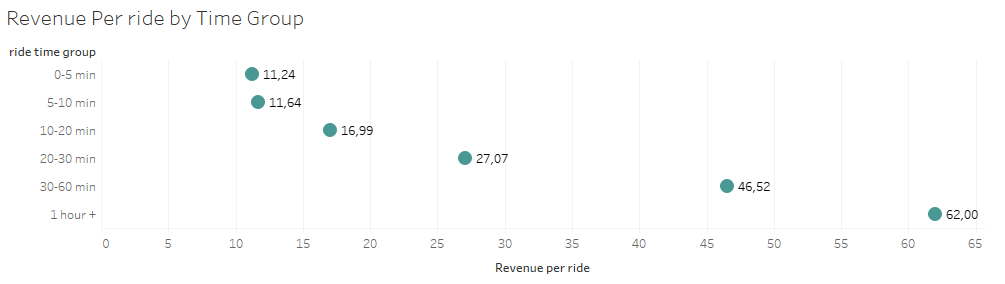

In [18]:
Image(filename='./pic/16.png')

### Set action on Sales Dashboard  
Sales Dashboard includes Set action, which allows us to by clicking on any time group in the "Sales by time groups" visualization to see what proportion of sales were contributed by the selected time group into the Sales Dynamics on "Sales Share by Time Group" visualization:  

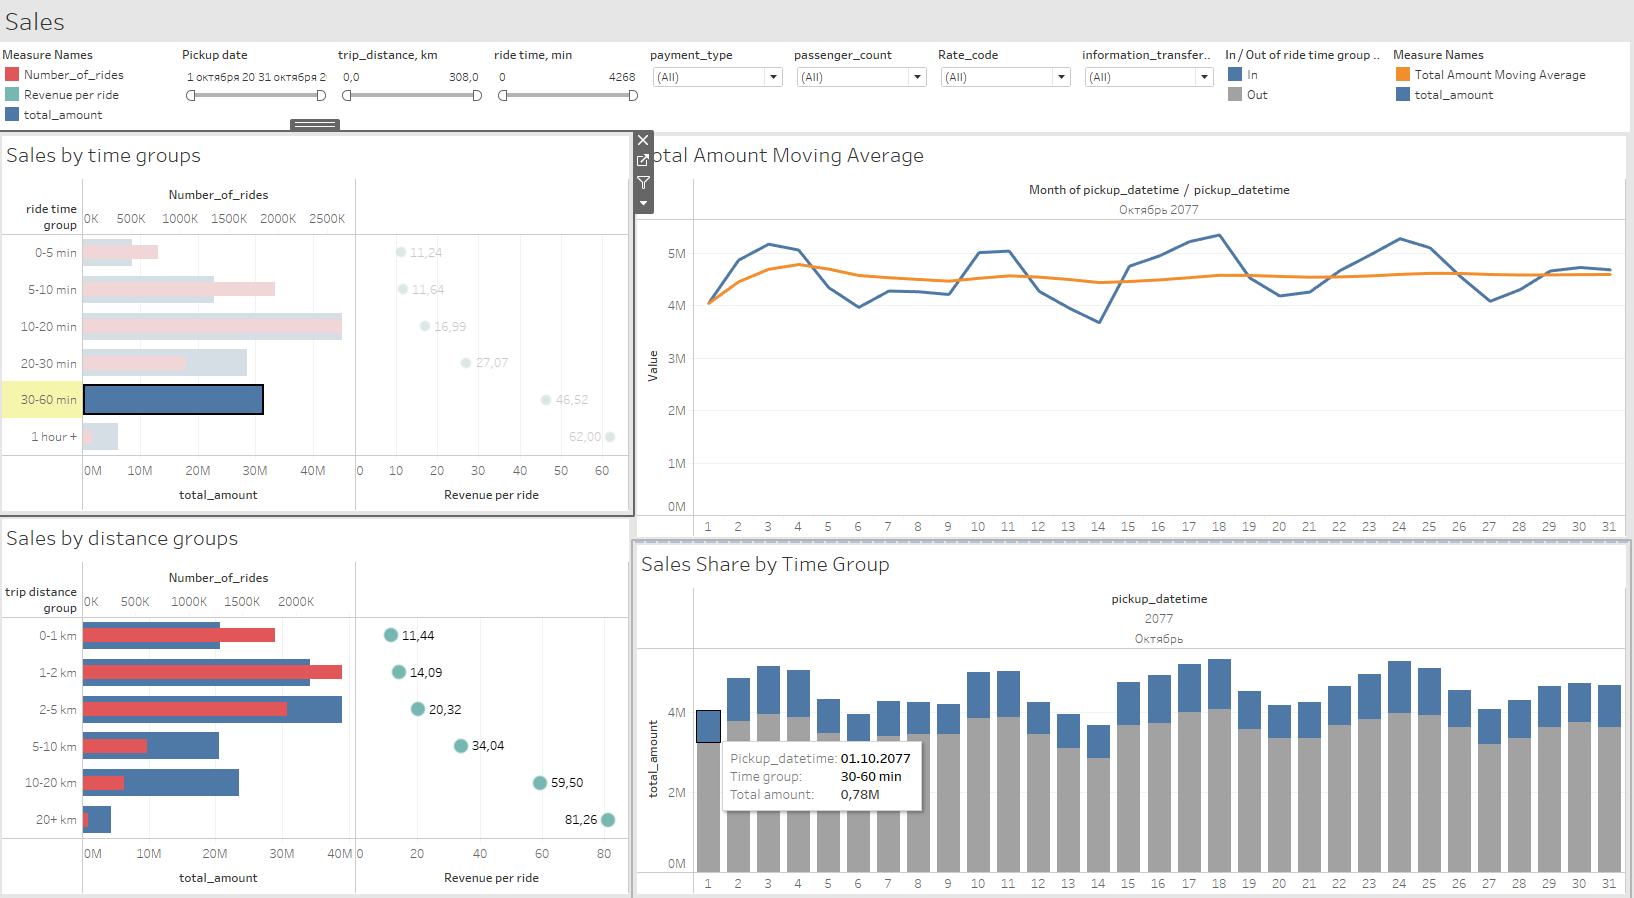

In [20]:
Image(filename='./pic/18.png')

# Heat Map Matrix of Locations:  
let's build Matrix of Start and End locations to visualize what paths are the most popular among our clients:  
we put locations ids into columns and rows of Matrix and show number of rides as the size of dots
  
We can use Parameter "KPI" to  change the Value of Interest (Number of Rides or Total Amount):  

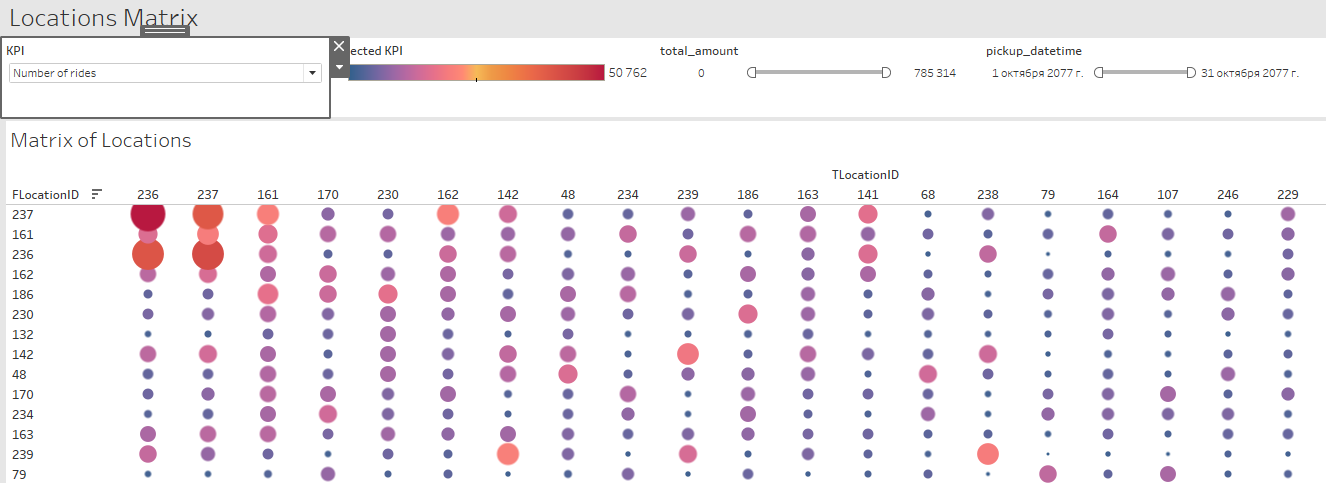

In [21]:
Image(filename='./pic/20.png')

To Look at the Locations from the Higher Level we can combine them into Locations Groups:  
- Both TLocation and FLocation fields were grouped by 50 location numbers each
- Then Aggregated tables were created to allow us to see KPI of interest by Location group
    - For convenience of Analysis, **Parameter Action** was created to allow to Expand each Location Category into Location Numbers to drill down to the location of interest:  

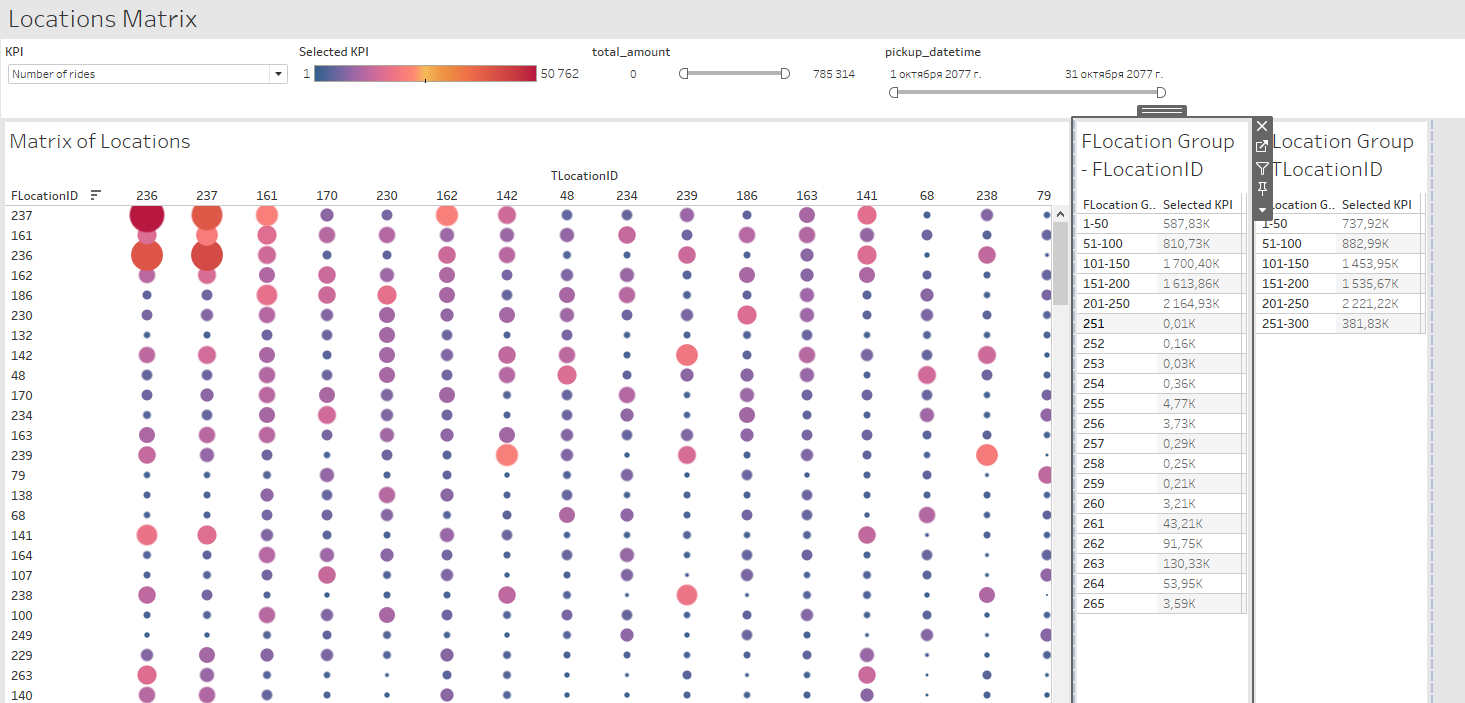

In [22]:
Image(filename='./pic/21.png')